In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random

In [2]:
# Reset the pseudo random number generator to the same value.
seed = 1012019
np.random.seed(seed)
random.seed(seed)

### Definição de funções úteis.

In [3]:
def calculateErrorSurface(x1, x2, y):
    """Generate data points for plotting the error surface."""
    # Number of examples.
    N = len(y)
    # Generate values for parameter space.
    M = 200
    a1 = np.linspace(-12.0, 14.0, M)
    a2 = np.linspace(-12.0, 14.0, M)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((M,M))
    for iter1 in range(0, M):
        for iter2 in range(0, M):
            # Hypothesis function.
            yhat = A1[iter1, iter2]*x1 + A2[iter1, iter2]*x2
            J[iter1, iter2] = (1.0/N)*np.sum(np.square(y - yhat))
            
    return J, A1, A2

def calculateClosedFormSolution(X, y):
    """Calculate closed-form solution using the normal equation."""
    # Number of examples.
    N = len(y)
    # Closed-form solution.
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    yhat = X.dot(a_opt)
    Joptimum = (1.0/N)*np.sum(np.power((y - yhat), 2))
    
    return Joptimum, a_opt

def stocasticGradientDescent(X, y, alpha, n_epochs):
    """Stocastic gradient descent solution."""
    
    # Number of examples.
    N = len(y)    

    # Random initialization of parameters.
    a = np.array([-10.0, -10.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_epochs*N+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)

    # Create array for storing error values.
    Jgd = np.zeros(n_epochs*N+1)

    # MSE for initial values.
    Jgd[0] = (1.0/N)*sum(np.power(y_noisy - X.dot(a), 2))

    # Stocastic gradient-descent loop.
    grad_hist = np.zeros((2, n_epochs*N))
    update_hist = np.zeros((2, n_epochs*N))
    # Epoch counter.
    for epoch in range(n_epochs):

        # Shuffle the whole dataset before every epoch.
        shuffled_indexes = random.sample(range(0, N), N) 

        # Iteration counter.
        for i in range(N):
            # Randomly selecting one training example.
            random_index = shuffled_indexes[i]
            xi = X[random_index:random_index+1]
            yi = y_noisy[random_index:random_index+1]

            # Update of the weights. 
            gradient = -2.0*xi.T.dot(yi - xi.dot(a))
            update = alpha * gradient
            a = a - update

            # Calculate MSE for new values.
            Jgd[epoch*N+i+1] = (1.0/N)*sum(np.power((y_noisy - X.dot(a)), 2))

            # Store history.
            grad_hist[:, epoch*N+i] = gradient.reshape(2,)
            update_hist[:, epoch*N+i] = update.reshape(2,)
            a_hist[:, epoch*N+i+1] = a.reshape(2,)
            
    return a, a_hist, Jgd, grad_hist, update_hist

**Observações**:

+ **Época**: corresponde a utilização de todo o conjunto de exemplos no treinamento do modelo, ou seja, é quando todo o conjunto é apresentado ao modelo.
+ **Iteração**: corresponde a um subconjunto de exemplos apresentados ao modelo. Conta o número de subconjuntos necessários para completar uma época, caso cada sub-conjunto seja menor do que o conjunto de total de exemplos.
+ Por exemplo, com o gradiente descendente em batelada, uma iteração é igual a uma época, pois apresenta-se ao modelo todos os dados de uma única vez.
+ Já com o gradiente descendente estocástico, precisa-se de $N$ iterações para se completar uma época.

### Gerando a função observável.

A **função objetivo** é dada por

$$y = x_1 + x_2 \;\;\;\;\;\;\text{(plano em 2D)}.$$

In [4]:
# Define the number of examples.
N = 1000

# Features.
x1 = np.random.randn(N, 1)
x2 = np.random.randn(N, 1)

# Generate target function (True function).
y = x1 + x2

# Noisy function.
y_noisy = y

### Plotando a superfície de erro.

A função hipótese tem o seguinte formato:

$$\hat{y} = h(\textbf{x}) = \hat{a}_1 x_1 + \hat{a}_2 x_2$$

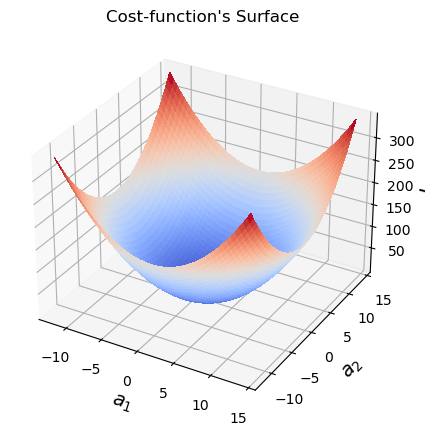

In [5]:
# Calculate data point for plotting error surface.
J, A1, A2 = calculateErrorSurface(x1, x2, y)

# Plot cost-function surface.
fig = plt.figure(figsize=(5,5))
plt.subplot(projection='3d')
ax = fig.gca()

surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
#plt.savefig("error_surface_sgd.png", dpi=600)
#Show the plot.
plt.show()

### Encontrando os pesos através da equação normal (solução ótima).

In [6]:
# Concatenate both column vectors, x1 and x2.
X = np.c_[x1, x2]

# Closed-form solution.
# Calculate closed-form solution.
Joptimum, a_opt = calculateClosedFormSolution(X, y_noisy)

print('--- Eq. Normal ---')
print('a1_opt: ', a_opt[0, 0])
print('a2_opt: ', a_opt[1, 0])
print('MSE:', Joptimum)

--- Eq. Normal ---
a1_opt:  1.0000000000000009
a2_opt:  1.0000000000000002
MSE: 8.640613917567877e-31


### Encontrando os pesos com o gradiente descendente  estocástico (GDE).

In [7]:
# Number of epochs.
n_epochs = 1

# Constant learning rate.
alpha = 0.1

# Run batch gradient-descent algorithm.
a, a_hist, Jgd, grad_hist, update_hist = stocasticGradientDescent(X, y_noisy, alpha, n_epochs)

print('--- SGD ---')
print('a1_sgd: ', a[0, 0])
print('a2_sgd: ', a[1, 0])
print('Erro SGD:', Jgd[n_epochs*N])

--- SGD ---
a1_sgd:  1.0
a2_sgd:  1.0
Erro SGD: 0.0


### Curva do erro em função das iterações de treinamento.

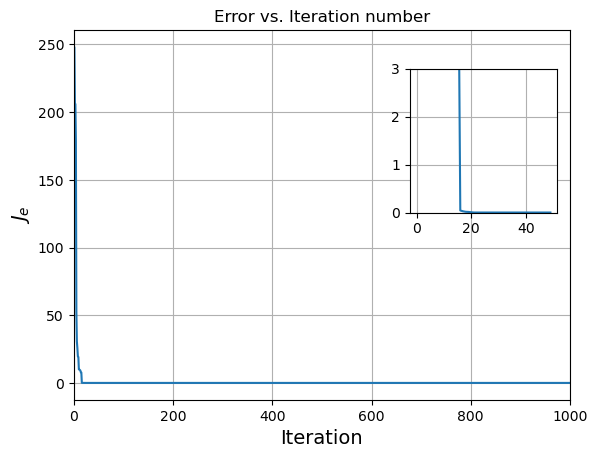

In [13]:
fig = plt.figure()

plt.plot(np.arange(0, n_epochs*N), Jgd[0:n_epochs*N])
plt.xlim((0, n_epochs*N))
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$J_e$', fontsize=14)
plt.title('Error vs. Iteration number')
plt.grid()

left, bottom, width, height = [0.65, 0.5, 0.23, 0.3]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.plot(np.arange(0, 50), Jgd[0:50])
ax3.grid()
ax3.set_ylim(0, 3)

#plt.savefig("error_vs_iteration_bgd.png", dpi=600)
plt.show()

**Observações**:

+ A aproximação do vetor gradiente com um única amostra não é ruidosa, pois o conjunto de dados não contém ruído, fazendo com que o algoritmo não oscile ao redor do mínimo.
+ Tempo de treinamento é menor quando comparado ao batelada, nesse caso, em torno de 20 iterações (i.e., amostras) o algoritmo já se aproxima do ponto ótimo e converge, por não existir ruído sendo adicionado aos exemplos de treinamento.

### Superfície de contorno e histórico de atualização dos pesos.

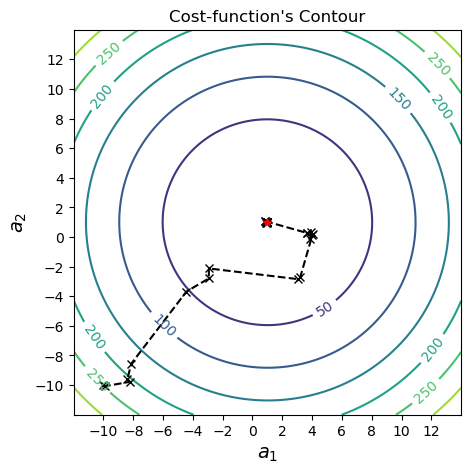

In [9]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_hist[0, :], a_hist[1, :], 'kx--')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.xticks(np.arange(-10, 14, step=2.0))
plt.yticks(np.arange(-10, 14, step=2.0))
#plt.savefig("error_contour_sgd.png", dpi=600)
plt.show()

**Observações**

+ A **aproximação** do vetor gradiente faz com que as **atualizações** dos pesos tenham **direções divergentes** a cada iteração.
+ Devido às derivadas parciais serem ruidosas, as **atualizações não seguem exatamente a direção de máximo decrescimento da superfície de erro**.
+ Por não conter ruído, o **algoritmo se estabiliza** no ponto de mínimo global, ou seja, o gradiente tende a zero.
+ Ao final do treinamento os valores dos pesos são ótimos, pois não há ruído no conjunto de treinamento.
+ Por não conter ruído, não necessitaria de um **esquema que diminua o valor do passo de aprendizagem**.

### Comparando os pesos encontrados com eq. normal de SGD.

In [10]:
# Print found values.
print('Eq. Normal')
print('a1_opt: ' + str(a_opt[0, 0]))
print('a2_opt: ' + str(a_opt[1, 0]))

print('\nSGD')
print('a1_sgd: ' + str(a[0, 0]))
print('a2_sgd: ' + str(a[1, 0]))

Eq. Normal
a1_opt: 1.0000000000000009
a2_opt: 1.0000000000000002

SGD
a1_sgd: 1.0
a2_sgd: 1.0


### Variação do gradiente.

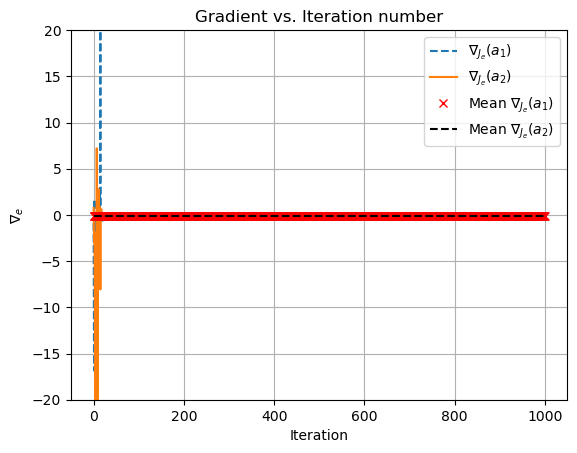

In [11]:
fig = plt.figure()

plt.plot(np.arange(0, n_epochs*N), grad_hist[0,:], '--', label='$\\nabla_{J_e} (a_1)$')
plt.plot(np.arange(0, n_epochs*N), grad_hist[1,:], label='$\\nabla_{J_e} (a_2)$')
plt.plot(np.arange(0, n_epochs*N), np.mean(grad_hist[0,:])*np.ones(n_epochs*N), 'rx', label='Mean $\\nabla_{J_e} (a_1)$')
plt.plot(np.arange(0, n_epochs*N), np.mean(grad_hist[1,:])*np.ones(n_epochs*N), 'k--', label='Mean $\\nabla_{J_e} (a_2)$')
plt.ylim([-20, 20])
plt.xlabel('Iteration')
plt.ylabel('$\\nabla_e$')
plt.title('Gradient vs. Iteration number')
plt.legend()
plt.grid()
plt.show()

**Observações**

+ Por não conter ruído, a convergência do algoritmo ocorre após poucas iterações.

### Variação da atualização.

**OBS**.: Os valores plotados são o resultado da multiplicação dos elementos do vetor gradiente pelo passo de aprendizagem.

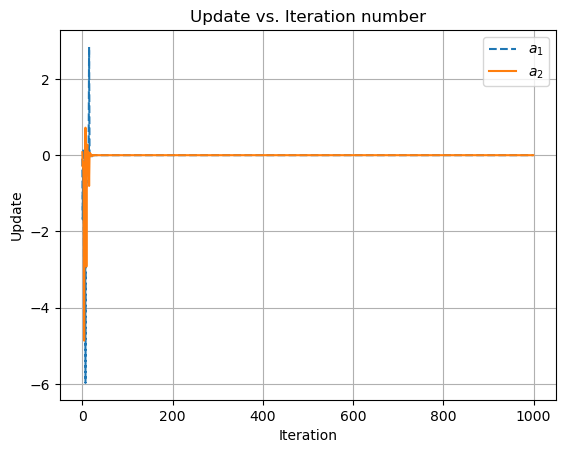

In [12]:
fig = plt.figure()

plt.plot(np.arange(0, n_epochs*N), update_hist[0,:], '--', label='$a_1$')
plt.plot(np.arange(0, n_epochs*N), update_hist[1,:], label='$a_2$')
plt.xlabel('Iteration')
plt.ylabel('Update')
plt.title('Update vs. Iteration number')
plt.legend()
plt.grid()
plt.show()